In [3]:
import pickle

# Load the banshee.pkl file
with open('banshee.pkl', 'rb') as file:
    banshee = pickle.load(file)

In [4]:
data = banshee[:8000]  # First 8000 samples
audio_data = banshee

NameError: name 'data' is not defined

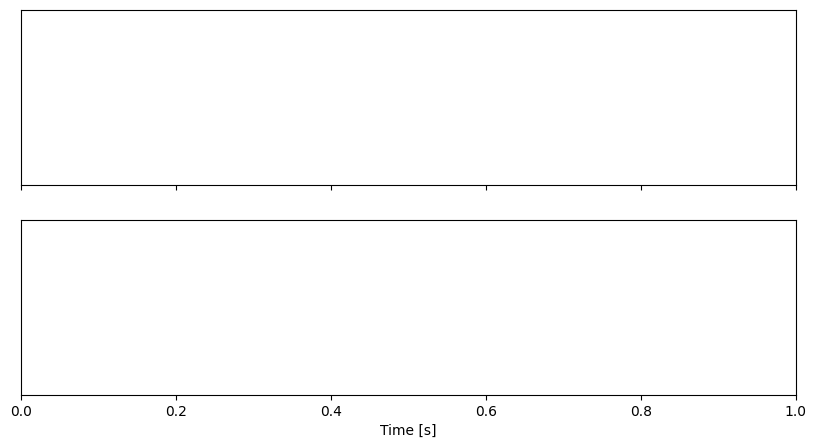

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection

# Signal parameters
fs = 8000
t = np.linspace(0, 1, fs, endpoint=False)
x = np.sin(2 * np.pi * 440 * t) + 0.5 * np.sin(2 * np.pi * 660 * t) 
# Frequencies in cycles per sample
frequencies = [0.003, 0.005, 0.0075, 0.01]
# Generate signal: sum of sinusoids
signal = sum(np.sin(2 * np.pi * f * np.arange(fs)) for f in frequencies) # Example signal
signal /= np.max(np.abs(signal))
data1 = signal

#x = data
# Gabor transform parameters
window_size = 1500
hop_size = 60
sigma = window_size / 6
f0 = .005  # cycles per sample for Morlet



# Morlet wavelet (real part)
n = np.arange(window_size)
t_wave = n - window_size / 2
morlet_real = np.cos(2 * np.pi * f0 * t_wave) * np.exp(-t_wave**2 / (2 * sigma**2))

# Gaussian window (for coloring)
g = morlet_real * np.exp(-t_wave**2 / (2 * sigma**2))
g = np.exp(-0.5 * ((np.arange(window_size) - window_size / 2) / sigma) ** 2)
g /= np.max(g)
g_min = 50 / 255
norm_g = g * (1 - g_min) + g_min

# Colormap for inactive signal
low_color = plt.cm.Blues(.392 / 2)

# Set up plot
fig, axs = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

line_inactive1, = axs[0].plot([], [], color=low_color, linewidth=1.5)
line_inactive2, = axs[0].plot([], [], color=low_color, linewidth=1.5)
lc_active = LineCollection([], linewidth=2)
axs[0].add_collection(lc_active)
axs[0].set_yticks([])

wavelet_line, = axs[1].plot([], [])
axs[1].set_yticks([])
axs[1].set_xlabel("Time [s]")

axs[0].set_xlim(0, 1)
axs[0].set_ylim(data1.min() * 1.1, data1.max() * 1.1)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(-1.1, 1.1)

def init():
    line_inactive1.set_data([], [])
    line_inactive2.set_data([], [])
    lc_active.set_segments([])
    wavelet_line.set_data([], [])
    return line_inactive1, line_inactive2, lc_active, wavelet_line

def update(frame_index):
    start = frame_index * hop_size
    end = start + window_size
    if end > len(data1):
        return line_inactive1, line_inactive2, lc_active, wavelet_line

    # Top plot (highlighted region)
    line_inactive1.set_data(t[:start], data1[:start])
    line_inactive2.set_data(t[end:], data1[end:])
    highlight_t = t[start:end]
    highlight_x = data1[start:end]
    points = np.array([highlight_t, highlight_x]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    colors = plt.cm.Blues(norm_g[:-1])
    lc_active.set_segments(segments)
    lc_active.set_color(colors)

    # Bottom plot (wavelet)
    w_plot = np.zeros_like(x)
    w_plot[start:end] = morlet_real
    wavelet_line.set_data(t, w_plot)

    return line_inactive1, line_inactive2, lc_active, wavelet_line

num_frames = (len(data) - window_size) // hop_size

ani = FuncAnimation(
    fig, update, frames=num_frames, init_func=init,
    blit=True, interval=30, repeat=False
)

ani.save(f'gifs/g{i}.gif', writer='pillow', fps=20)
plt.tight_layout()
plt.show()


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

# --- Parameters ---
fs = 8000
duration = 1.0
n_samples = int(fs * duration)
frequencies = [0.003, 0.005, 0.0075, 0.01]
frequencies.reverse()  # cycles/sample
n_segments = 20
segment_len = n_samples // n_segments
t = np.arange(n_samples)

# --- Generate synthetic signal with random frequency segments ---
rng = np.random.default_rng(42)
signal = np.zeros(n_samples)
masks = {f: np.zeros(n_samples, dtype=bool) for f in frequencies}

for i in range(n_segments):
    start = i * segment_len
    end = start + segment_len
    t_seg = np.arange(segment_len)
    
    # Weighted selection to make 0.003 less likely
    weights = [0.2 if f == 0.003 else 1.0 for f in frequencies]
    prob = np.array(weights) / np.sum(weights)

    n_freqs = rng.integers(0, len(frequencies)+1)
    freqs_here = rng.choice(frequencies, size=n_freqs, replace=False, p=prob)

    segment = np.zeros(segment_len)
    for f in freqs_here:
        segment += np.sin(2 * np.pi * f * t_seg)
        masks[f][start:end] = True
    segment *= np.hanning(segment_len)
    signal[start:end] += segment


signal /= np.max(np.abs(signal))
signal += 0.00 * rng.normal(size=n_samples)


([], [])

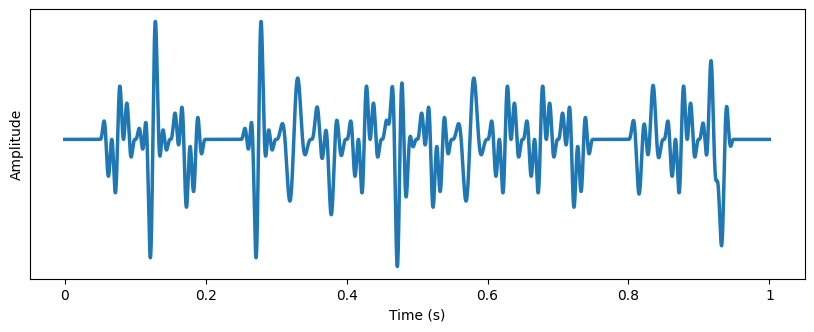

In [45]:
# Signal parameters
fs = 8000*4
t = np.linspace(0, 1*4, fs, endpoint=False)
x = np.sin(2 * np.pi * 440 * t) + 0.5 * np.sin(2 * np.pi * 660 * t) 
# Frequencies in cycles per sample
frequencies = [0.003, 0.005, 0.0075, 0.01]
# Generate signal: sum of sinusoids
signal1 = sum(np.sin(2 * np.pi * f * np.arange(fs)) for f in frequencies) # Example signal
signal1 /= np.max(np.abs(signal))

plt.figure(figsize=(10, 3.5))
plt.plot(signal, linewidth=2.5)
plt.xlabel('Time (s)',fontsize=10)
plt.ylabel('Amplitude',fontsize=10)
plt.xticks([0,int(8000/5),2*int(8000/5),int(8000/5)*3,int(8000/5)*4,8000],[0,.2,.4,.6,.8,1])
plt.yticks([])

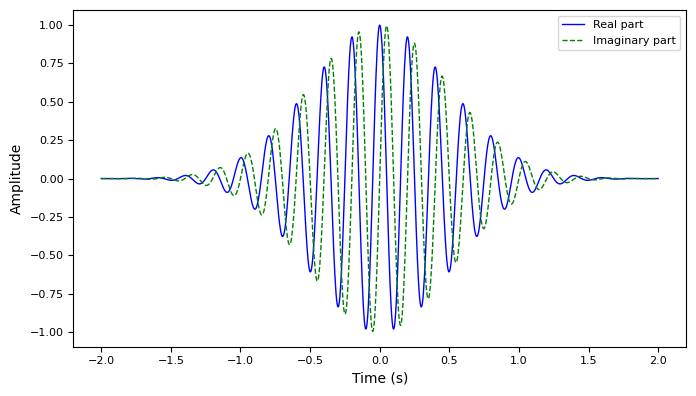

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define time vector
t = np.linspace(-2, 2, 1000)

# Morlet wavelet parameters
f0 = 5      # Central frequency in Hz
sigma = .5   # Standard deviation of Gaussian

# Construct the Morlet wavelet
morlet_real = np.exp(-t**2 / (2 * sigma**2)) * np.cos(2 * np.pi * f0 * t)
morlet_imag = np.exp(-t**2 / (2 * sigma**2)) * np.sin(2 * np.pi * f0 * t)
morlet_wavelet = morlet_real + 1j * morlet_imag
#remo
# Plot the real and imaginary parts
plt.figure(figsize=(7, 4))
plt.plot(t, morlet_real, label='Real part', color='blue',linewidth=1)
plt.plot(t, morlet_imag, label='Imaginary part', color='green', linestyle='--',linewidth = 1)
plt.xlabel('Time (s)',fontsize=10)
plt.ylabel('Amplitude',fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()


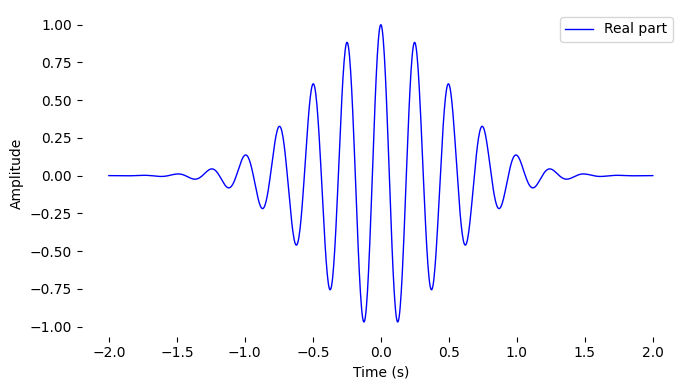

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define time vector
t = np.linspace(-2, 2, 1000)

# Morlet wavelet parameters
f0 = 4      # Central frequency in Hz
sigma = .5   # Standard deviation of Gaussian

# Construct the Morlet wavelet
morlet_real = np.exp(-t**2 / (2 * sigma**2)) * np.cos(2 * np.pi * f0 * t)

# Plot the real and imaginary parts
plt.figure(figsize=(7, 4))
#remove all spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)    
plt.plot(t, morlet_real, label='Real part', color='blue',linewidth=1)

plt.xlabel('Time (s)',fontsize=10)
plt.ylabel('Amplitude',fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()


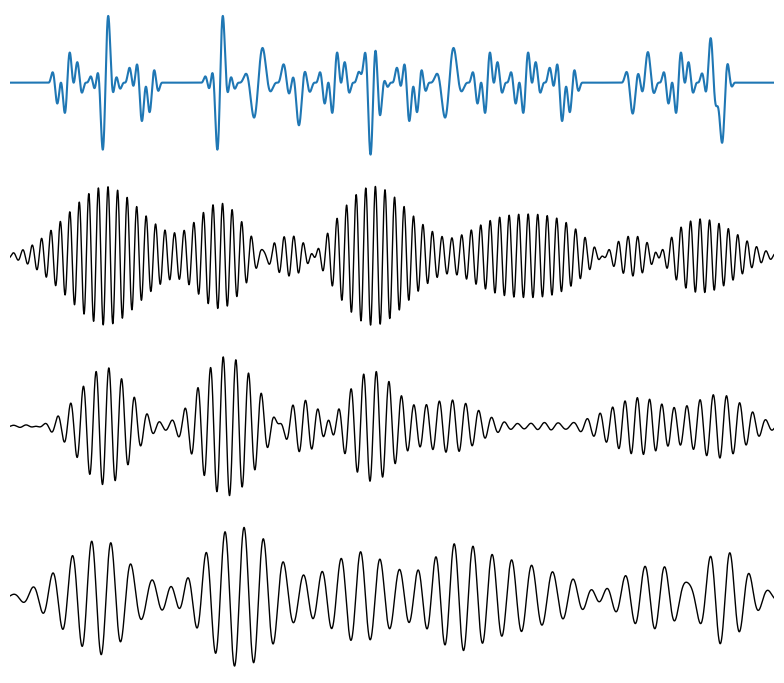

In [119]:

# --- Morlet convolution ---
window_size = 1500
sigma = window_size / 6
n = np.arange(window_size)
t_wave = n - window_size / 2

convolutions = {}
for f in frequencies:
    morlet = np.cos(2 * np.pi * f * t_wave) * np.exp(-t_wave**2 / (2 * sigma**2))
    conv = fftconvolve(signal, morlet, mode='same')
    convolutions[f] = conv

# --- Plot ---
fig, axs = plt.subplots(4, 1, figsize=(8, 7), sharex=True)
for ax in axs:
    for spine in ax.spines.values():
        spine.set_visible(False)

time = np.linspace(0, duration, n_samples, endpoint=False)
axs[0].plot(time, signal)
#axs[0].set_title("Original Signal")
axs[0].set_yticks([])

for i, f in enumerate(frequencies[:-1]):
    axs[i+1].plot(time, convolutions[f], color='black', linewidth=1)
    #axs[i].set_ylabel(f"{f:.4f}", rotation=0, labelpad=40)
    axs[i+1].set_yticks([])
    axs[i+1].set_xlim(0, duration)
    axs[i+1].set_xticks([])

plt.tight_layout()
plt.show()


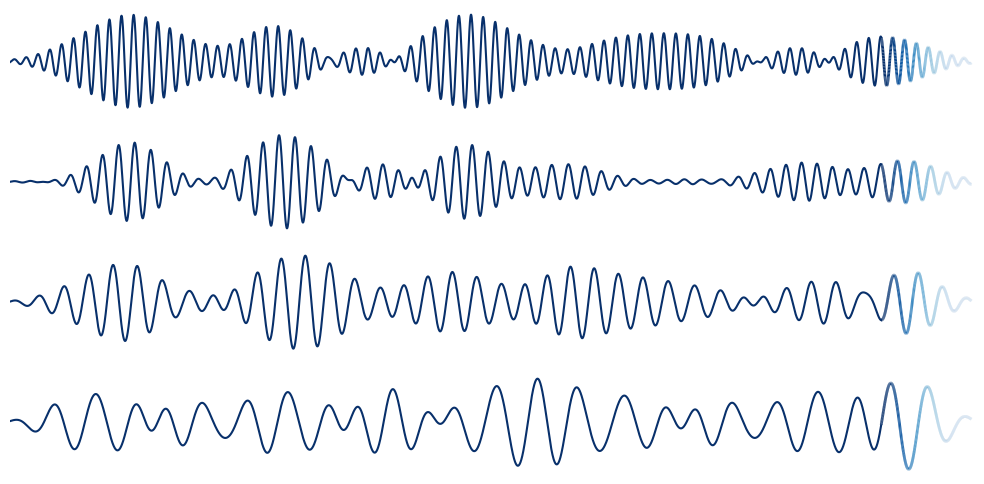

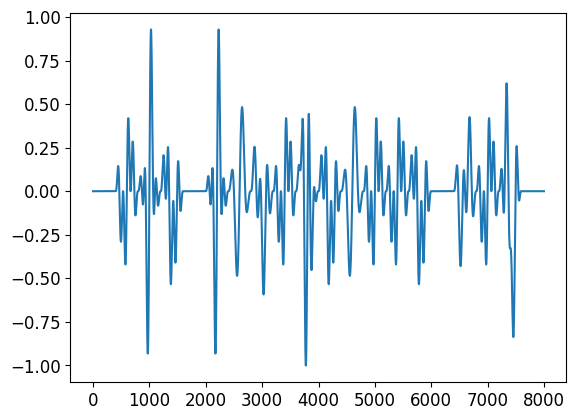

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection
from scipy.signal import fftconvolve

# --- Parameters ---
fs = 8000
duration = 1.0
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
frequencies = [0.003, 0.005, 0.0075, 0.01]
frequencies.reverse()  # cycles/sample
window_size = 1500
hop_size = 60
sigma = window_size / 6
n = np.arange(window_size)
t_wave = n - window_size / 2

# --- Signal ---

# --- Convolutions ---
convolutions = {}
for f in frequencies:
    morlet = np.cos(2 * np.pi * f * t_wave) * np.exp(-t_wave**2 / (2 * (sigma)**2))
    conv = fftconvolve(signal, morlet, mode='same')
    convolutions[f] = conv / np.max(np.abs(conv))

# --- Gaussian for color ---
g = np.exp(-0.5 * ((n - window_size / 2) / sigma) ** 2)
g /= np.max(g)
g_min = 50 / 255
norm_g = g * (1 - g_min) + g_min

# --- Plot setup ---
fig, axs = plt.subplots(4, 1, figsize=(10, 5), sharex=True)
lines_inactive = []
lc_actives = []

for ax in axs:
    ax.set_xlim(0, duration)
    ax.set_ylim(-1.1, 1.1)
    ax.set_yticks([])
    ax.set_xticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

    line_inactive, = ax.plot([], [], linewidth=1.5)
    lc_active = LineCollection([], linewidth=2)
    ax.add_collection(lc_active)

    lines_inactive.append(line_inactive)
    lc_actives.append(lc_active)

#axs[-1].set_xticks([0, 0.5, 1])

# --- Animation logic ---
def init():
    for line in lines_inactive:
        line.set_data([], [])
    for lc in lc_actives:
        lc.set_segments([])
    return lines_inactive + lc_actives

def update(frame_idx):
    start = frame_idx * hop_size
    end = start + window_size
    if end > len(t):
        return []

    for i, f in enumerate(frequencies):
        y = convolutions[f]

        lines_inactive[i].set_data(t[:start + 750], y[:start + 750])
        lines_inactive[i].set_color(plt.cm.Blues(norm_g[750:-1][0]))

        highlight_t = t[start + 750:end]
        highlight_y = y[start + 750:end]
        points = np.array([highlight_t, highlight_y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        colors = plt.cm.Blues(norm_g[750:-1])
        lc_actives[i].set_segments(segments)
        lc_actives[i].set_color(colors)

    return lines_inactive + lc_actives

num_frames = 120

ani = FuncAnimation(
    fig, update, frames=num_frames, init_func=init,
    blit=True, interval=30, repeat=False
)

plt.tight_layout()
ani.save('convolution_animation.gif', writer='pillow', fps=20)

plt.show()
plt.plot(signal)

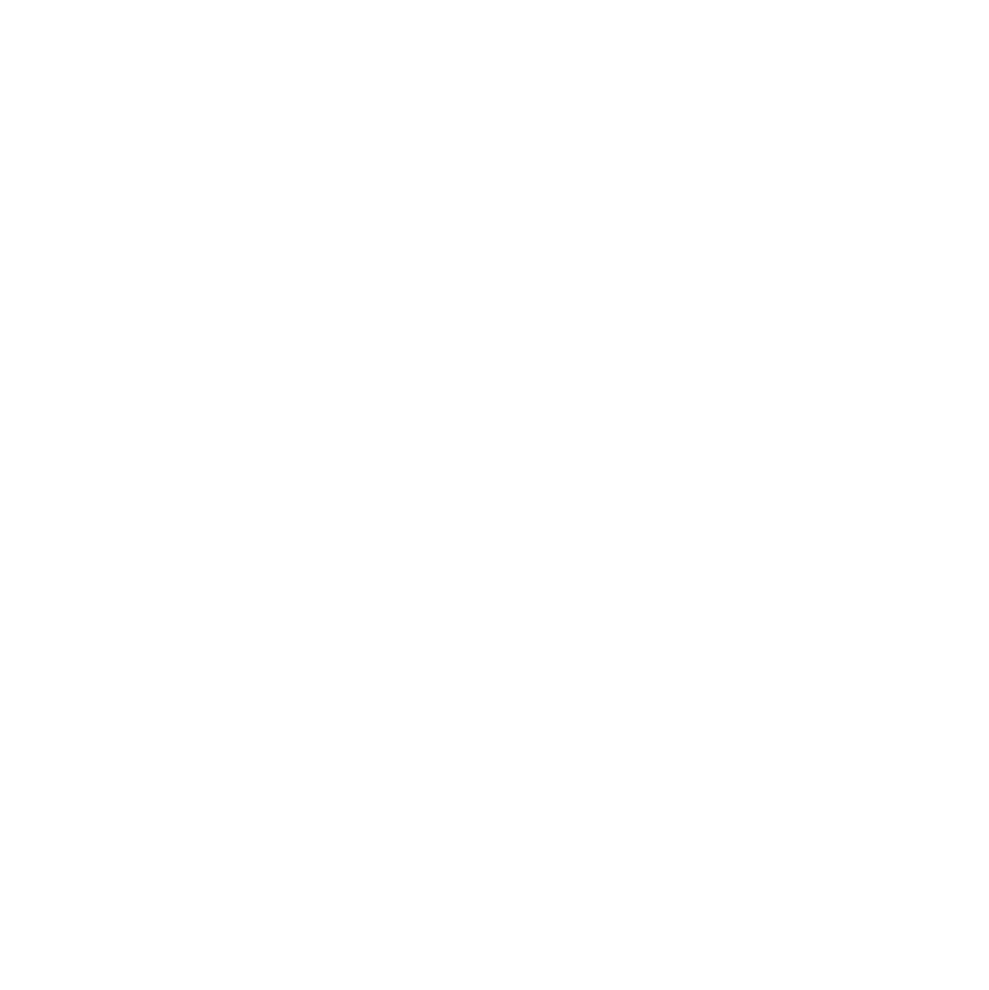

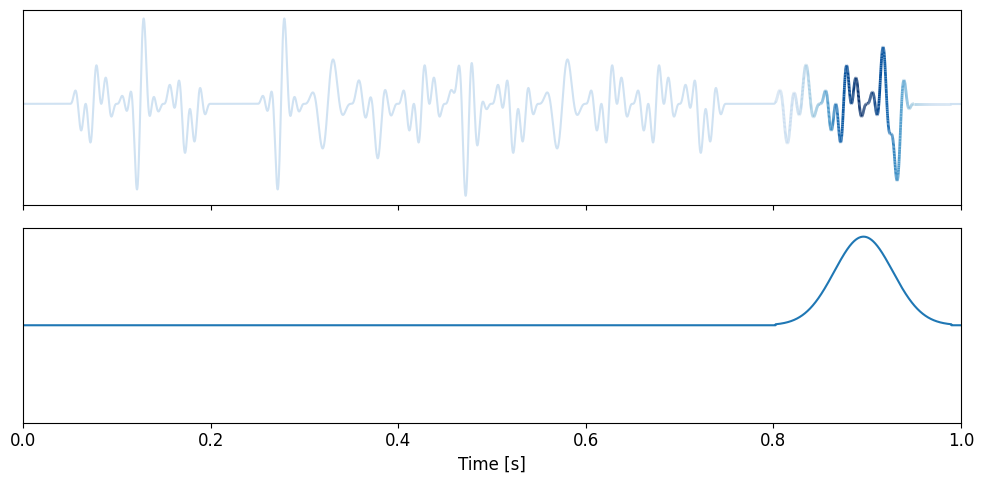

In [270]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection

# Signal parameters
fs = 8000
t = np.linspace(0, 1, fs, endpoint=False)
x = np.sin(2 * np.pi * 440 * t) + 0.5 * np.sin(2 * np.pi * 660 * t) 
# Frequencies in cycles per sample
frequencies = [0.003, 0.005, 0.0075, 0.01]

# Generate signal: sum of sinusoids
#signal = sum(np.sin(2 * np.pi * f * np.arange(fs)) for f in frequencies) # Example signal
#signal /= np.max(np.abs(signal))
data1 = signal

#x = data
# Gabor transform parameters
window_size = 1500
hop_size = 60
sigma = window_size / 6
f0 = 0.005  # cycles per sample for Morlet



# Morlet wavelet (real part)
n = np.arange(window_size)
t_wave = n - window_size / 2
morlet_real = np.cos(2 * np.pi * f0 * t_wave) * np.exp(-t_wave**2 / (2 * sigma**2))

# Gaussian window (for coloring)
g = morlet_real * np.exp(-t_wave**2 / (2 * sigma**2))
g = np.exp(-0.5 * ((np.arange(window_size) - window_size / 2) / sigma) ** 2)
g /= np.max(g)
g_min = 50 / 255
norm_g = g * (1 - g_min) + g_min

# Colormap for inactive signal
low_color = plt.cm.Blues(.392 / 2)

# Set up plot
fig, axs = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

line_inactive1, = axs[0].plot([], [], color=low_color, linewidth=1.5)
line_inactive2, = axs[0].plot([], [], color=low_color, linewidth=1.5)
lc_active = LineCollection([], linewidth=2)
axs[0].add_collection(lc_active)
axs[0].set_yticks([])

wavelet_line, = axs[1].plot([], [])
axs[1].set_yticks([])
axs[1].set_xlabel("Time [s]")

axs[0].set_xlim(0, 1)
axs[0].set_ylim(data1.min() * 1.1, data1.max() * 1.1)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(-1.1, 1.1)

def init():
    line_inactive1.set_data([], [])
    line_inactive2.set_data([], [])
    lc_active.set_segments([])
    wavelet_line.set_data([], [])
    return line_inactive1, line_inactive2, lc_active, wavelet_line

def update(frame_index):
    start = frame_index * hop_size
    end = start + window_size
    if end > len(data1):
        return line_inactive1, line_inactive2, lc_active, wavelet_line

    # Top plot (highlighted region)
    line_inactive1.set_data(t[:start], data1[:start])
    line_inactive2.set_data(t[end:], data1[end:])
    highlight_t = t[start:end]
    highlight_x = data1[start:end]
    points = np.array([highlight_t, highlight_x]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    colors = plt.cm.Blues(norm_g[:-1])
    lc_active.set_segments(segments)
    lc_active.set_color(colors)

    # Bottom plot (wavelet)
    w_plot = np.zeros_like(x)
    w_plot[start:end] = g
    wavelet_line.set_data(t, w_plot)

    return line_inactive1, line_inactive2, lc_active, wavelet_line

num_frames = (len(data) - window_size) // hop_size

ani = FuncAnimation(
    fig, update, frames=num_frames, init_func=init,
    blit=True, interval=30, repeat=False
)

ani.save('gifs/transientsnarrow.gif', writer='pillow', fps=20)
plt.tight_layout()
plt.show()


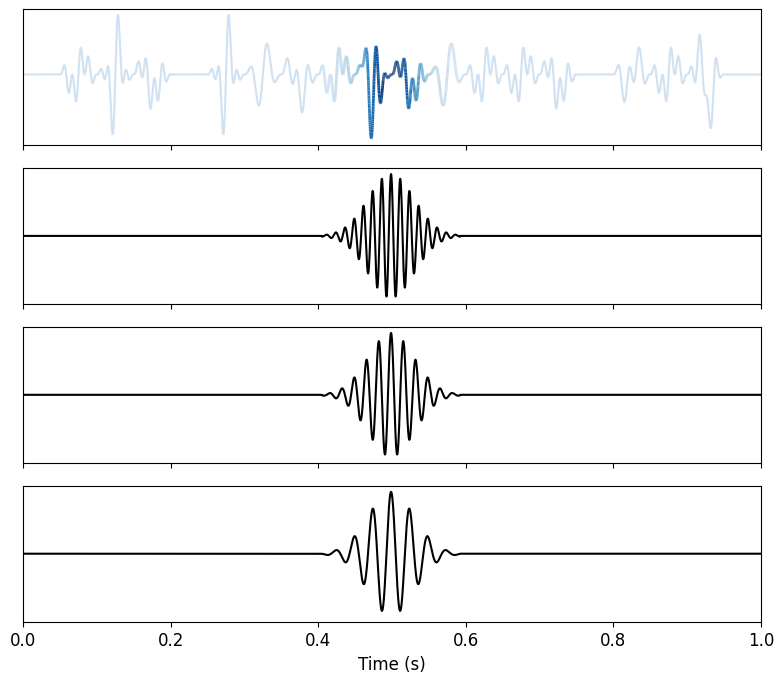

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
plt.rcParams.update({'font.size': 12})
# --- Signal setup ---
fs = 8000
t = np.linspace(0, 1, fs, endpoint=False)
frequencies = [0.01, 0.0075, 0.005, 0.003]
# using predefined signal
data = signal

# --- Parameters ---
window_size = 1500
hop_size = 60
sigma = window_size / 6

# Precompute Morlet wavelets (real part only)
n = np.arange(window_size)
t_wave = n - window_size / 2
morlets = {
    f: np.cos(2 * np.pi * f * t_wave) * np.exp(-t_wave**2 / (2 * sigma**2))
    for f in frequencies
}

# Gaussian window for coloring
g = np.exp(-0.5 * ((np.arange(window_size) - window_size / 2) / sigma) ** 2)
g /= np.max(g)
g_min = 50 / 255
norm_g = g * (1 - g_min) + g_min

low_color = plt.cm.Blues(.392 / 2)

# --- Plot setup ---
fig, axs = plt.subplots(4, 1, figsize=(8, 7), sharex=True)

# Middle frame index
num_frames = (len(data) - window_size) // hop_size
frame_index = num_frames // 2
start = frame_index * hop_size
end = start + window_size

# Top plot (signal with highlighted window)
axs[0].plot(t[:start], data[:start], color=low_color, linewidth=1.5)
axs[0].plot(t[end:], data[end:], color=low_color, linewidth=1.5)

highlight_t = t[start:end]
highlight_x = data[start:end]
points = np.array([highlight_t, highlight_x]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
colors = plt.cm.Blues(norm_g[:-1])
lc_active = LineCollection(segments, colors=colors, linewidth=2)
axs[0].add_collection(lc_active)

axs[0].set_xlim(0, 1)
axs[0].set_ylim(data.min() * 1.1, data.max() * 1.1)
axs[0].set_yticks([])

# Bottom plots: each Morlet wavelet
for i, ax in enumerate(axs[1:]):
    f = frequencies[i]
    w_plot = np.zeros_like(data)
    w_plot[start:end] = morlets[f]
    ax.plot(t, w_plot, color='black')
    ax.set_ylim(-1.1, 1.1)
    ax.set_yticks([])

axs[-1].set_xlabel("Time (s)")
# Clean up axes
'''
for ax in axs:
    ax.set_xticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

        '''
plt.tight_layout()
plt.show()


1201
1601
2401


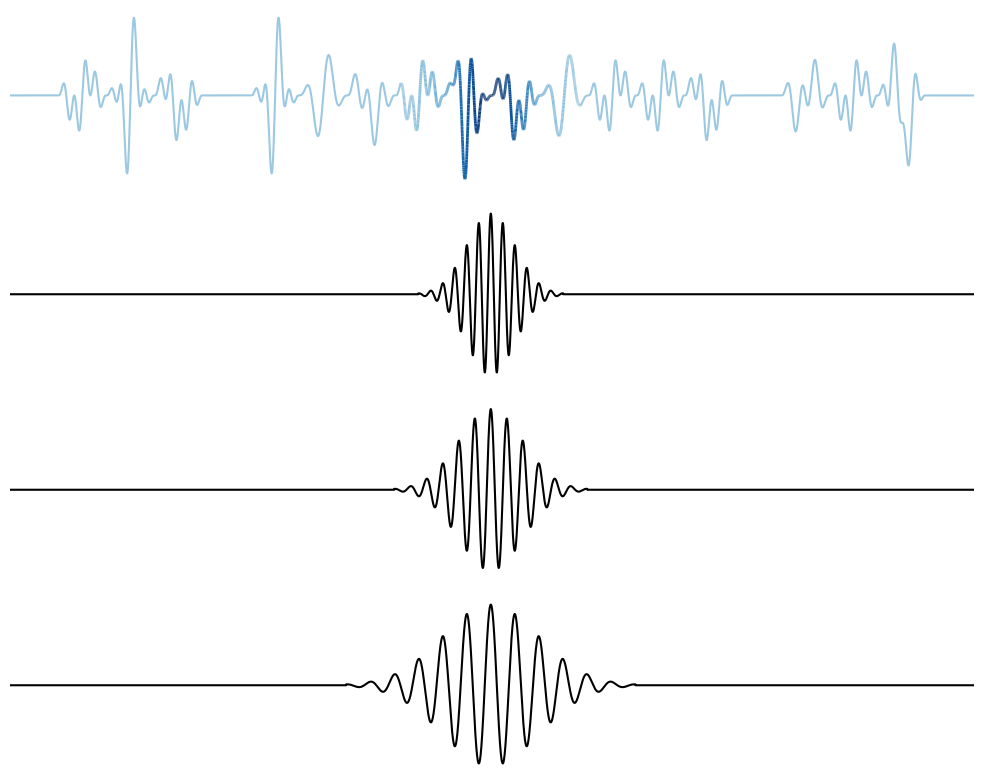

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# --- Signal setup ---
fs = 8000
t = np.linspace(0, 1, fs, endpoint=False)
frequencies = [0.01, 0.0075, 0.005, 0.003]
# using predefined signal
data = signal  # assume `signal` is defined elsewhere

# --- Parameters ---
base_window_size = 1500  # size for signal highlight
hop_size = 60
N_cycles = 6  # same number of oscillations for each wavelet

# --- Frame setup ---
num_frames = (len(data) - base_window_size) // hop_size
frame_index = num_frames // 2
start = frame_index * hop_size
end = start + base_window_size
center = start + base_window_size // 2

# --- Gaussian window for coloring ---
sigma = base_window_size / 6
g = np.exp(-0.5 * ((np.arange(base_window_size) - base_window_size / 2) / sigma) ** 2)
g /= np.max(g)
g_min = 50 / 255
norm_g = g * (1 - g_min) + g_min
low = .38
low_color = plt.cm.Blues(low)

# --- Precompute Morlets ---
morlets = {}
window_sizes = {}

for f in frequencies:
    duration = N_cycles / f/4000
    window_size = int(duration * fs)
    if window_size % 2 == 0:
        window_size += 1
    t_wave = np.arange(window_size) - window_size // 2
    sigma_f = window_size / 6
    morlet = np.cos(2 * np.pi * f * t_wave) * np.exp(-t_wave**2 / (2 * sigma_f**2))
    morlets[f] = morlet
    window_sizes[f] = window_size

# --- Plotting ---
fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Signal plot
axs[0].plot(t[:start], data[:start], color=low_color, linewidth=1.5)
axs[0].plot(t[end:], data[end:], color=low_color, linewidth=1.5)

highlight_t = t[start:end]
highlight_x = data[start:end]
points = np.array([highlight_t, highlight_x]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# --- Color gradient setup ---
fade_min = low # match inactive color

norm_g = np.exp(-0.5 * ((np.arange(base_window_size) - base_window_size / 2) / sigma) ** 2)
norm_g -= norm_g.min()
norm_g /= norm_g.max()
norm_g = norm_g * (1 - fade_min) + fade_min
colors = plt.cm.Blues(norm_g[:-1])
lc_active = LineCollection(segments, colors=colors, linewidth=2)
axs[0].add_collection(lc_active)

axs[0].set_xlim(0, 1)
axs[0].set_ylim(data.min() * 1.1, data.max() * 1.1)
axs[0].set_yticks([])

# Morlet wavelet plots
for i, f in enumerate(frequencies[:-1]):
    ax = axs[i+1]
    morlet = morlets[f]
    win = window_sizes[f]
    print(win)
    half = win // 2
    s = center - half
    e = s + win

    w_plot = np.zeros_like(data)
    if s >= 0 and e <= len(data):
        w_plot[s:e] = morlet
        ax.plot(t, w_plot, color='black')

    ax.set_ylim(-1.1, 1.1)
    ax.set_yticks([])

#axs[-1].set_xlabel("Time (s)")
# Clean up axes
for ax in axs:
    ax.set_xticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection

# --- Signal setup ---
fs = 8000
t = np.linspace(0, 1, fs, endpoint=False)
frequencies = [0.01, 0.0075, 0.005, 0.003]
# using predefined signal
data = signal

# --- Parameters ---
base_window_size = 1500  # size for signal highlight
hop_size = 60
N_cycles = 12  # doubled oscillations for wider wavelets

# --- Gaussian window for coloring ---
sigma = base_window_size / 6
# Inverted colors - dark on light background
low = .7  # Light inactive color
low_color = (0.7, 0.7, 0.7)  # Light gray for inactive signal

# --- Precompute Morlets ---
morlets = {}
window_sizes = {}

for f in frequencies:
    duration = N_cycles / f
    window_size = int(duration)  # Simplified calculation
    if window_size % 2 == 0:
        window_size += 1
    t_wave = np.arange(window_size) - window_size // 2
    sigma_f = window_size / 6
    morlet = np.cos(2 * np.pi * f * t_wave) * np.exp(-t_wave**2 / (2 * sigma_f**2))
    morlets[f] = morlet
    window_sizes[f] = window_size

print("Window sizes:", window_sizes)
print("Data length:", len(data))

# --- Animation setup ---
fig, axs = plt.subplots(4, 1, figsize=(10, 8))

# Set transparent background for web display
fig.patch.set_alpha(0.0)  # Make figure background transparent
for ax in axs:
    ax.patch.set_alpha(0.0)  # Make subplot backgrounds transparent

# Initialize all line objects
line_inactive1, = axs[0].plot([], [], color=low_color, linewidth=1.5)
line_inactive2, = axs[0].plot([], [], color=low_color, linewidth=1.5)
lc_active = LineCollection([], linewidth=2)
axs[0].add_collection(lc_active)

# Set axis limits
axs[0].set_xlim(0, 1)
axs[0].set_ylim(data.min() * 1.1, data.max() * 1.1)
axs[0].set_yticks([])

# Bottom plots: moving Morlet wavelets (dark color for visibility)
wavelet_lines = []
for i, f in enumerate(frequencies[:-1]):
    line, = axs[i+1].plot([], [], color='black')  # Dark wavelets
    wavelet_lines.append(line)
    axs[i+1].set_xlim(0, 1)
    axs[i+1].set_ylim(-1.1, 1.1)
    axs[i+1].set_yticks([])

# Clean up axes
for ax in axs:
    ax.set_xticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

def init():
    # Initialize with static data for first frame
    line_inactive1.set_data([], [])
    line_inactive2.set_data([], [])
    lc_active.set_segments([])
    for line in wavelet_lines:
        line.set_data([], [])
    return [line_inactive1, line_inactive2, lc_active] + wavelet_lines

def update(frame_index):
    # Calculate frame position - start from half window before beginning
    start_offset = -base_window_size // 2  # Start halfway off-screen
    start = frame_index * hop_size + start_offset
    end = start + base_window_size
    
    # Handle bounds for signal highlighting
    signal_start = max(0, start)
    signal_end = min(len(data), end)
    
    center = start + base_window_size // 2
    
    # Update top signal plot
    if signal_start > 0:
        line_inactive1.set_data(t[:signal_start], data[:signal_start])
    else:
        line_inactive1.set_data([], [])
        
    if signal_end < len(data):
        line_inactive2.set_data(t[signal_end:], data[signal_end:])
    else:
        line_inactive2.set_data([], [])
    
    # Highlighted region with color gradient (inverted - dark on light)
    if signal_start < signal_end:
        highlight_t = t[signal_start:signal_end]
        highlight_x = data[signal_start:signal_end]
        
        if len(highlight_t) > 1:
            points = np.array([highlight_t, highlight_x]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            
            # Color gradient setup - dark colors for active region
            highlight_len = len(highlight_t)
            fade_min = 0.8  # Light gray minimum
            fade_max = 0.0  # Dark maximum
            norm_g = np.exp(-0.5 * ((np.arange(highlight_len) - highlight_len / 2) / sigma) ** 2)
            norm_g -= norm_g.min()
            norm_g /= norm_g.max()
            # Invert the gradient: light edges, dark center
            norm_g = fade_min + norm_g * (fade_max - fade_min)
            colors = [(g, g, g) for g in norm_g[:-1]]  # Grayscale gradient
            lc_active.set_segments(segments)
            lc_active.set_color(colors)
        else:
            lc_active.set_segments([])
    else:
        lc_active.set_segments([])
    
    # Update Morlet wavelet plots
    for i, f in enumerate(frequencies[:-1]):
        morlet = morlets[f]
        win = window_sizes[f]
        half = win // 2
        s = center - half
        e = s + win
        
        w_plot = np.zeros_like(data)
        
        # Handle wavelets that extend beyond data bounds
        if s < len(data) and e > 0:  # Wavelet intersects with data
            data_start = max(0, s)
            data_end = min(len(data), e)
            morlet_start = max(0, -s)
            morlet_end = morlet_start + (data_end - data_start)
            
            if morlet_end <= len(morlet):
                w_plot[data_start:data_end] = morlet[morlet_start:morlet_end]
        
        wavelet_lines[i].set_data(t, w_plot)
    
    return [line_inactive1, line_inactive2, lc_active] + wavelet_lines

# Calculate number of frames - extend to allow wavelets to go off-screen
# Start from half window before beginning, end half window after end
# Need to account for the largest wavelet window size
max_wavelet_size = max(window_sizes.values()) if window_sizes else base_window_size
start_offset = base_window_size // 2  # How much we start before data begins
end_offset = max_wavelet_size // 2    # How much we continue after data ends to get wavelets halfway off-screen

total_travel = len(data) + start_offset + end_offset  # Full travel distance
num_frames = min(150, total_travel // hop_size)  # Increased max frames to accommodate longer travel
print(f"Number of frames: {num_frames}")
print(f"Max wavelet size: {max_wavelet_size}")
print(f"Data length: {len(data)}")
print(f"Total travel distance: {total_travel}")

# Create animation at 30fps with proper interval
ani = FuncAnimation(
    fig, update, frames=num_frames, init_func=init,
    blit=False, interval=33, repeat=True  # 33ms interval = ~30fps
)

plt.tight_layout()

# Save animation as GIF with transparent background
print("Saving animation...")
try:
    # Try to save with transparency support
    ani.save('morlets.gif', writer='pillow', fps=30, 
             savefig_kwargs={'transparent': True, 'bbox_inches': 'tight', 'pad_inches': 0})
    print("Animation saved as 'morlets.gif' with transparency")
except Exception as e:
    print(f"Transparency save failed: {e}")
    print("Saving without transparency...")
    # Fallback to standard save
    ani.save('morlets.gif', writer='pillow', fps=30)
    print("Animation saved as 'morlets.gif'")

plt.close(fig)  # Close the figure to avoid displaying it

NameError: name 'signal' is not defined

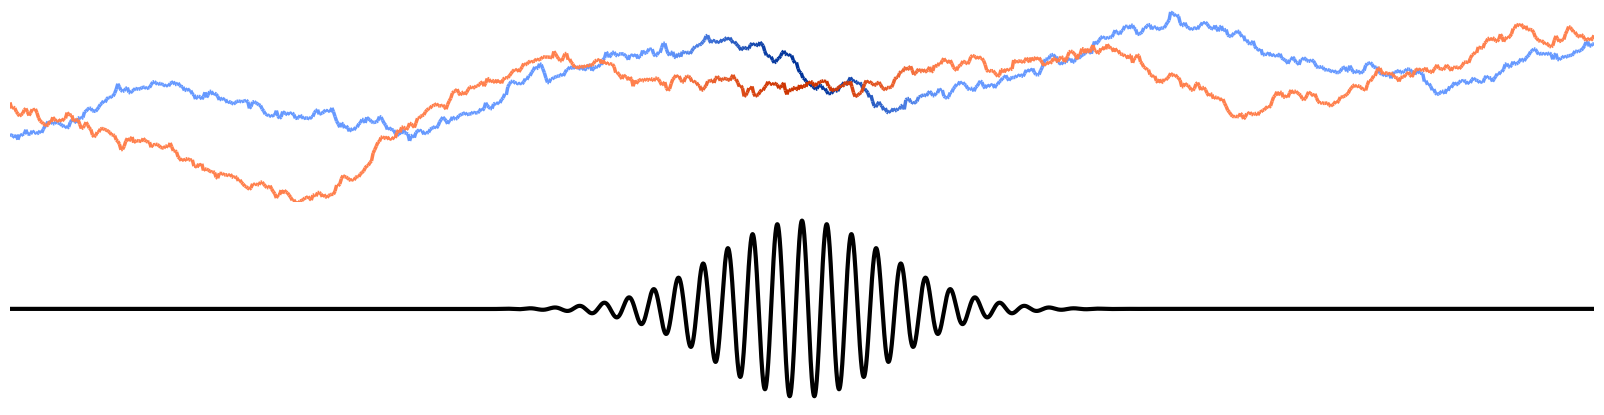

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.ndimage import gaussian_filter1d
from matplotlib.collections import LineCollection

# Sampling
fs = 1000
t = np.linspace(0, 1, fs)

# Simulate two "stock price" signals with noise + smoothing
np.random.seed(1)
raw1 = np.cumsum(np.random.randn(fs)) * 0.3 + 100
raw2 = np.cumsum(np.random.randn(fs)) * 0.3 + 80
price1 = raw1+np.sin(2 * np.pi * 3 * t) * 5  # Add a sine wave for periodicity
price2 = raw2+np.cos(2 * np.pi * 3 * t) * 5  # Add a cosine wave for periodicity
# Amplify the swings
price1 = (price1 - np.mean(price1)) * 10 + 100  # center at 100
price2 = (price2 - np.mean(price2)) * 10 + 80   # center at 80

# Overlap region fade (symmetric)
overlap_start = 0.4
overlap_end = 0.6
fade_region = (t >= overlap_start) & (t <= overlap_end)
fade_vals = 0.5 * (1 - np.cos(2 * np.pi * (t[fade_region] - overlap_start) / (overlap_end - overlap_start)))
fade = np.zeros_like(t)
fade[fade_region] = fade_vals

# Build colored line segments for both signals
def build_faded_line(t, y, fade, base_color, fade_color, linewidth=2.5):
    points = np.array([t, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    colors = [
        tuple(
            base_color[i] * (1 - a) + fade_color[i] * a
            for i in range(3)
        ) for a in fade[:-1]
    ]
    return LineCollection(segments, colors=colors, linewidth=linewidth)

# Color definitions (light → dark fade) - adjusted for light background
color1_light = (0.4, 0.6, 1.0)  # medium blue
color1_dark  = (0.0, 0.2, 0.6)   # dark blue

color2_light = (1.0, 0.5, 0.3)   # medium orange
color2_dark  = (0.8, 0.2, 0.0)   # dark red

lc1 = build_faded_line(t, price1, fade, color1_light, color1_dark)
lc2 = build_faded_line(t, price2, fade, color2_light, color2_dark)

# Morlet wavelet
wavelet = pywt.ContinuousWavelet('cmor1.5-4.0')
psi, x = wavelet.wavefun(level=20)

# Plotting with transparent background
fig, axs = plt.subplots(2, 1, figsize=(15.84, 3.96), dpi=100)

# Set transparent background
fig.patch.set_alpha(0.0)  # Make figure background transparent
for ax in axs:
    ax.patch.set_alpha(0.0)  # Make subplot backgrounds transparent

# Top: Two "stock" lines
axs[0].add_collection(lc1)
axs[0].add_collection(lc2)
axs[0].set_xlim(t[0], t[-1])
combined = np.concatenate([price1, price2])
axs[0].set_ylim(combined.min() * 0.98, combined.max() * 1.02)

# Bottom: Wavelet in dark color for visibility on light backgrounds
axs[1].plot(x, np.real(psi), color='black', linewidth=3.0)
axs[1].set_xlim(x[0], x[-1])

# Clean visuals
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0.05)
plt.show()

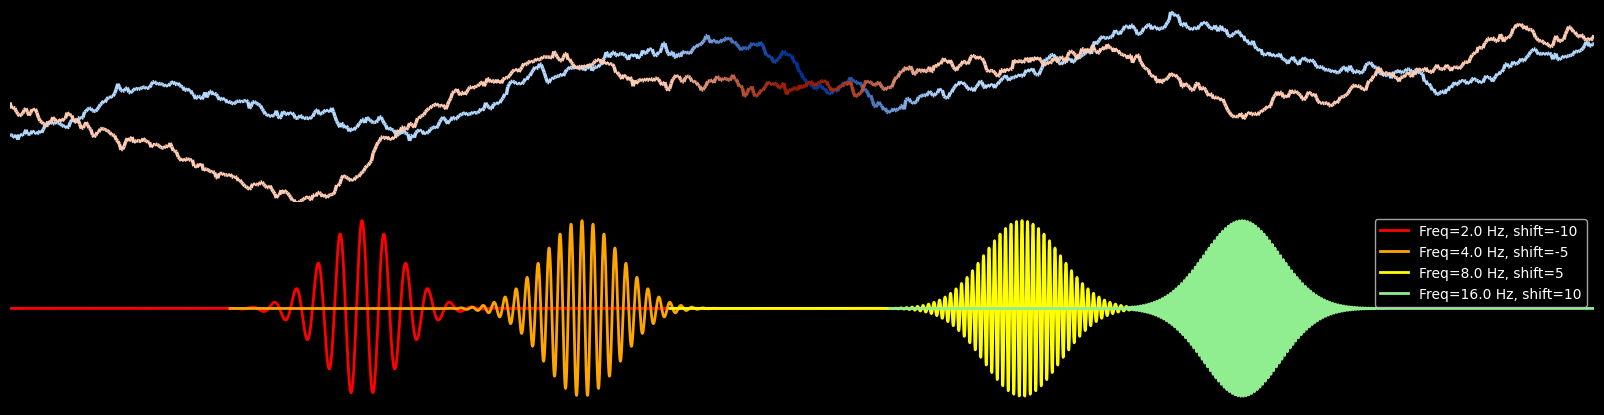

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from matplotlib.collections import LineCollection

plt.style.use('dark_background')

fs = 1000
t = np.linspace(0, 1, fs)

np.random.seed(1)
raw1 = np.cumsum(np.random.randn(fs)) * 0.3 + 100
raw2 = np.cumsum(np.random.randn(fs)) * 0.3 + 80
price1 = raw1 + np.sin(2 * np.pi * 3 * t) * 5
price2 = raw2 + np.cos(2 * np.pi * 3 * t) * 5

price1 = (price1 - np.mean(price1)) * 10 + 100
price2 = (price2 - np.mean(price2)) * 10 + 80

overlap_start = 0.4
overlap_end = 0.6
fade_region = (t >= overlap_start) & (t <= overlap_end)
fade_vals = 0.5 * (1 - np.cos(2 * np.pi * (t[fade_region] - overlap_start) / (overlap_end - overlap_start)))
fade = np.zeros_like(t)
fade[fade_region] = fade_vals

def build_faded_line(t, y, fade, base_color, fade_color, linewidth=2.5):
    points = np.array([t, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    colors = [
        tuple(
            base_color[i] * (1 - a) + fade_color[i] * a
            for i in range(3)
        ) for a in fade[:-1]
    ]
    return LineCollection(segments, colors=colors, linewidth=linewidth)

color1_light = (0.7, 0.85, 1.0)
color1_dark  = (0.0, 0.2, 0.6)
color2_light = (1.0, 0.8, 0.7)
color2_dark  = (0.6, 0.1, 0.0)

lc1 = build_faded_line(t, price1, fade, color1_light, color1_dark)
lc2 = build_faded_line(t, price2, fade, color2_light, color2_dark)

fig, axs = plt.subplots(2, 1, figsize=(15.84, 3.96), dpi=100)

axs[0].add_collection(lc1)
axs[0].add_collection(lc2)
axs[0].set_xlim(t[0], t[-1])
combined = np.concatenate([price1, price2])
axs[0].set_ylim(combined.min() * 0.98, combined.max() * 1.02)

freqs = [2.0, 4.0, 8.0, 16.0]
colors = ['red', 'orange', 'yellow', 'lightgreen']
shifts = [-10, -5, 5, 10]  # wider spacing

for f, c, s in zip(freqs, colors, shifts):
    wavelet = pywt.ContinuousWavelet(f'cmor1.5-{f}')
    psi, x = wavelet.wavefun(level=20)
    axs[1].plot(x + s, np.real(psi), color=c, linewidth=2, label=f'Freq={f} Hz, shift={s}')

axs[1].set_xlim(min(x + shifts[0]), max(x + shifts[-1]))
axs[1].legend(loc='upper right')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0.05)
plt.show()


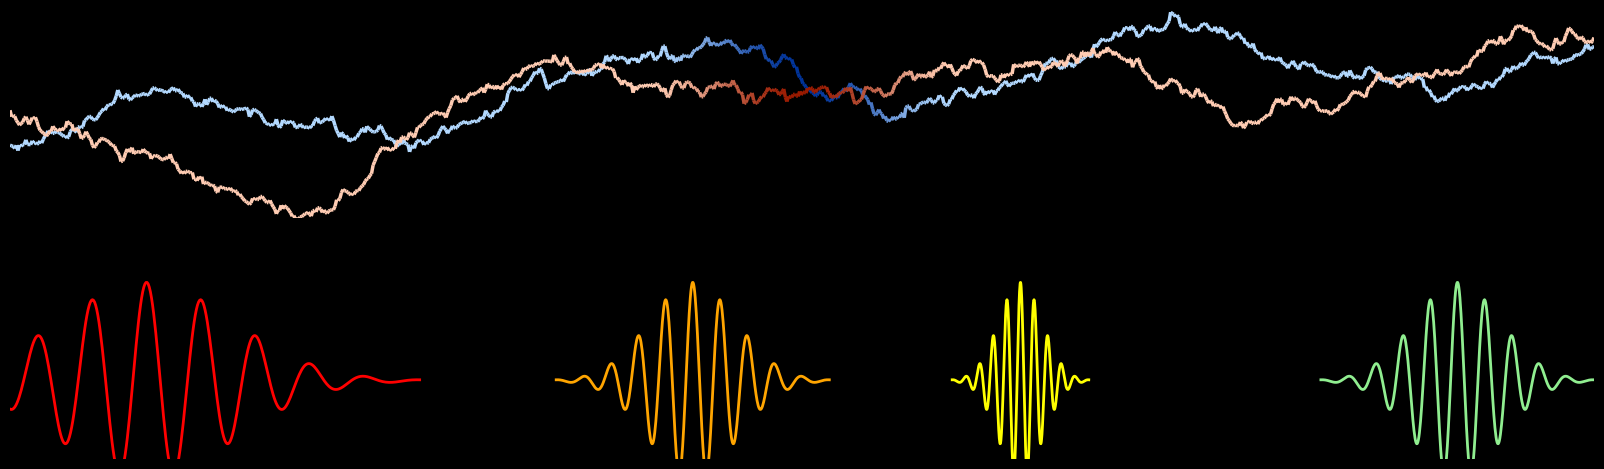

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

plt.style.use('dark_background')

# Sampling for the stock prices
fs = 1000
t = np.linspace(0, 1, fs)

np.random.seed(1)
raw1 = np.cumsum(np.random.randn(fs)) * 0.3 + 100
raw2 = np.cumsum(np.random.randn(fs)) * 0.3 + 80
price1 = raw1 + np.sin(2 * np.pi * 3 * t) * 5
price2 = raw2 + np.cos(2 * np.pi * 3 * t) * 5

price1 = (price1 - np.mean(price1)) * 10 + 100
price2 = (price2 - np.mean(price2)) * 10 + 80

# Overlap region fade (symmetric)
overlap_start = 0.4
overlap_end = 0.6
fade_region = (t >= overlap_start) & (t <= overlap_end)
fade_vals = 0.5 * (1 - np.cos(2 * np.pi * (t[fade_region] - overlap_start) / (overlap_end - overlap_start)))
fade = np.zeros_like(t)
fade[fade_region] = fade_vals

def build_faded_line(t, y, fade, base_color, fade_color, linewidth=2.5):
    points = np.array([t, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    colors = [
        tuple(
            base_color[i] * (1 - a) + fade_color[i] * a
            for i in range(3)
        ) for a in fade[:-1]
    ]
    return LineCollection(segments, colors=colors, linewidth=linewidth)

color1_light = (0.7, 0.85, 1.0)
color1_dark  = (0.0, 0.2, 0.6)
color2_light = (1.0, 0.8, 0.7)
color2_dark  = (0.6, 0.1, 0.0)

lc1 = build_faded_line(t, price1, fade, color1_light, color1_dark)
lc2 = build_faded_line(t, price2, fade, color2_light, color2_dark)

fig, axs = plt.subplots(2, 1, figsize=(15.84, 4.5), dpi=100)

# Top subplot: stock price signals with fade
axs[0].add_collection(lc1)
axs[0].add_collection(lc2)
axs[0].set_xlim(t[0], t[-1])
combined = np.concatenate([price1, price2])
axs[0].set_ylim(combined.min() * 0.98, combined.max() * 1.02)

# Bottom subplot: Morlet wavelets with same number of oscillations and horizontal shifts
N_oscillations = 10
freqs = [2, 4, 8, 4]
colors = ['red', 'orange', 'yellow', 'lightgreen']
shifts = [-5, 0, 3, 7]

for f, c, s in zip(freqs, colors, shifts):
    # Duration for fixed number of oscillations
    T = N_oscillations / f
    t_wave = np.linspace(-T/2, T/2, 500)
    
    # Approximate std deviation to fit N oscillations within the window
    sigma = N_oscillations / (2 * np.pi * f)
    
    # Morlet wavelet real part (normalized)
    wavelet = (np.pi ** (-0.25)) * np.cos(2 * np.pi * f * t_wave) * np.exp(-t_wave**2 / (2 * sigma**2))
    
    axs[1].plot(t_wave + s, wavelet, color=c, linewidth=2, label=f'{f} Hz')

axs[1].set_xlim(min(t_wave + shifts[0]), max(t_wave + shifts[-1]))
axs[1].set_ylim(-0.6, 1.0)  # fix y limits for better visual comparison

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0.15)
plt.show()


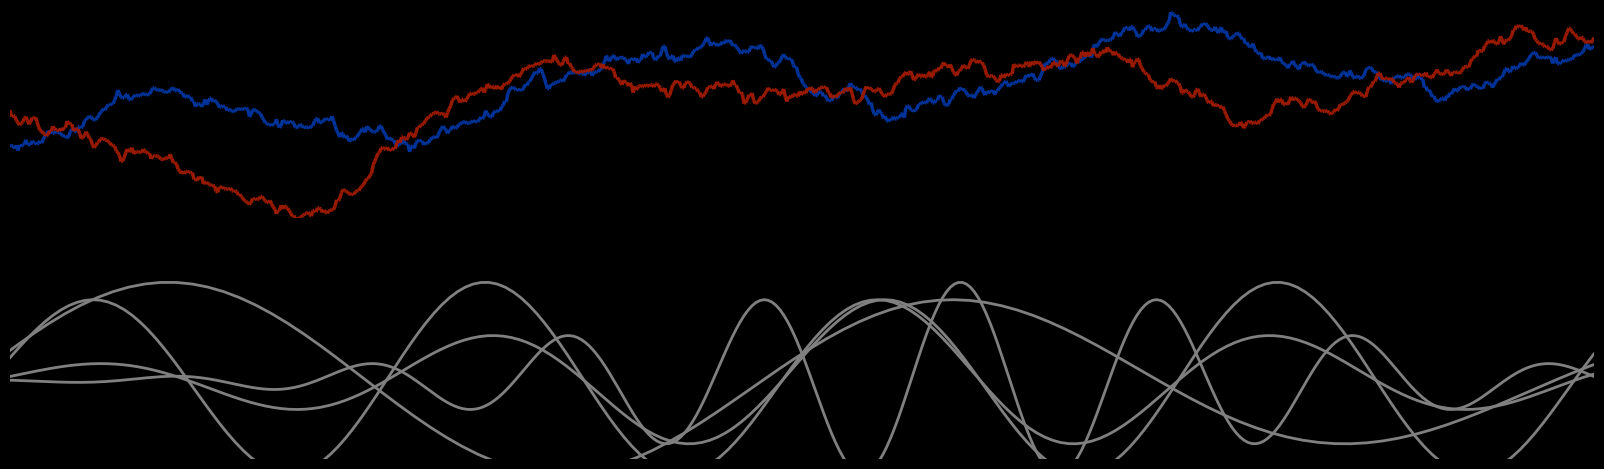

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

plt.style.use('dark_background')

# Sampling for the stock prices
fs = 1000
t = np.linspace(0, 1, fs)

np.random.seed(1)
raw1 = np.cumsum(np.random.randn(fs)) * 0.3 + 100
raw2 = np.cumsum(np.random.randn(fs)) * 0.3 + 80
price1 = raw1 + np.sin(2 * np.pi * 3 * t) * 5
price2 = raw2 + np.cos(2 * np.pi * 3 * t) * 5

price1 = (price1 - np.mean(price1)) * 10 + 100
price2 = (price2 - np.mean(price2)) * 10 + 80

def build_faded_line(t, y, fade, base_color, fade_color, linewidth=2.5):
    points = np.array([t, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    colors = [
        tuple(
            base_color[i] * (1 - a) + fade_color[i] * a
            for i in range(3)
        ) for a in fade[:-1]
    ]
    return LineCollection(segments, colors=colors, linewidth=linewidth)

color1_light = (0.7, 0.85, 1.0)
color1_dark  = (0.0, 0.2, 0.6)
color2_light = (1.0, 0.8, 0.7)
color2_dark  = (0.6, 0.1, 0.0)

# Wavelet parameters
N_oscillations = 10
freqs = [2, 4, 8, 4]

# Positions for wavelets and fades in the signal time domain [0,1]
shifts = [0.1, 0.3, 0.6, 0.8]

# Initialize fade arrays for both signals (fully light)
fade1 = np.zeros_like(t)
fade2 = np.zeros_like(t)

# Build fade regions aligned with wavelets
for f, s in zip(freqs, shifts):
    T = N_oscillations / f          # duration of wavelet window
    left = s - T/2
    right = s + T/2
    
    # Boolean index for fade region, clipped to signal domain
    fade_region = (t >= left) & (t <= right)
    if not np.any(fade_region):
        continue
    
    # Cosine fade envelope: 0 → 1 → 0 within each fade region
    fade_vals = 0.5 * (1 - np.cos(2 * np.pi * (t[fade_region] - left) / (right - left)))
    
    # Add fades (sum in case of overlap)
    fade1[fade_region] += fade_vals
    fade2[fade_region] += fade_vals

# Clip fades to max 1 to avoid over-darkening
fade1 = np.clip(fade1, 0, 1)
fade2 = np.clip(fade2, 0, 1)

# Build LineCollections for signals with multiple fade highlights
lc1 = build_faded_line(t, price1, fade1, color1_light, color1_dark)
lc2 = build_faded_line(t, price2, fade2, color2_light, color2_dark)

fig, axs = plt.subplots(2, 1, figsize=(15.84, 4.5), dpi=100)

# Plot top signals with fade highlights
axs[0].add_collection(lc1)
axs[0].add_collection(lc2)
axs[0].set_xlim(t[0], t[-1])
combined = np.concatenate([price1, price2])
axs[0].set_ylim(combined.min() * 0.98, combined.max() * 1.02)

for f, s in zip(freqs, shifts):
    T = N_oscillations / f
    # Create t_wave linearly spaced inside the fade window, so wavelet fits exactly
    t_wave = np.linspace(s - T/2, s + T/2, 500)
    # Wavelet time vector centered at 0 for calculation
    t_wave_centered = t_wave - s
    sigma = N_oscillations / (2 * np.pi * f)
    wavelet = (np.pi ** (-0.25)) * np.cos(2 * np.pi * f * t_wave_centered) * np.exp(-t_wave_centered**2 / (2 * sigma**2))
    axs[1].plot(t_wave, wavelet, color='grey', linewidth=2)

axs[1].set_xlim(0, 1)
axs[1].set_ylim(-0.6, 1.0)

# Clean axes for clarity
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0.15)
plt.show()


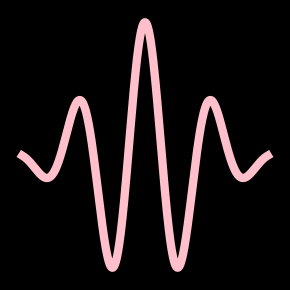

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def morlet_wavelet(t, f0=.8, sigma=.8):
    """Generate a real-valued Morlet wavelet."""
    return np.cos(2 * np.pi * f0 * t) * np.exp(-t**2 / (2 * sigma**2))

# Make the wavelet wider by increasing sigma
t = np.linspace(-6, 6, 1200)
psi_real = morlet_wavelet(t, f0=.3, sigma=2.5)

fig, ax = plt.subplots(figsize=(3, 3), facecolor='black')
ax.plot(t, psi_real, color='pink', lw=6)
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.savefig('icon2.png', bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)